# Performance Metrics
Imagine a fellow student comes up with the predictions of 3 different models on the same test data. You want to decide together which of the model is the best. 

In [1]:
import pandas as pd
data = pd.read_csv('3models.csv')
data.head()

,y_test,y_test_pred1,y_test_pred2,y_test_pred3
0,10.0,8.04,9.14,7.46
1,8.0,6.95,8.14,6.77
2,13.0,7.58,8.74,12.74
3,9.0,8.81,8.77,7.11
4,11.0,8.33,9.26,7.81


__Task:__ As shown on the last notebooks, calculate the MSE between the predictions and the observed data.

In [2]:
from sklearn.metrics import mean_squared_error as mse

print('MSE prediction 1: %.03f' %mse(data.y_test, data.y_test_pred1))
print('MSE prediction 2: %.03f' %mse(data.y_test, data.y_test_pred2))
print('MSE prediction 3: %.03f' %mse(data.y_test, data.y_test_pred3))

MSE prediction 1: 5.998
MSE prediction 2: 6.000
MSE prediction 3: 6.003


As a good data analyst you do not want to base your decision on a single metric.

__Task__: Calculate the Coefficient of Determination $R^2$ for all 3 predictions.

In [3]:
from sklearn.metrics import r2_score as r2

print('R2 prediction 1: %.03f' %r2(data.y_test, data.y_test_pred1))
print('R2 prediction 2: %.03f' %r2(data.y_test, data.y_test_pred2))
print('R2 prediction 3: %.03f' %r2(data.y_test, data.y_test_pred3))

R2 prediction 1: 0.400
R2 prediction 2: 0.400
R2 prediction 3: 0.400


Not happy yet? Maybe some more metrics could help!

__Task:__ Calculate the Pearson Correlation Coefficient and the Spearman Rank Correlation Coefficient _(Hint: Use the_ ```scipy.stats``` _package)_

In [4]:
from scipy.stats import pearsonr as pr
from scipy.stats import spearmanr as sr

print('Pearson r prediction 1: %.03f' %pr(data.y_test, data.y_test_pred1)[0])
print('Pearson r prediction 2: %.03f' %pr(data.y_test, data.y_test_pred2)[0])
print('Pearson r prediction 3: %.03f' %pr(data.y_test, data.y_test_pred3)[0])

print('Spearman r prediction 1: %.03f' %sr(data.y_test, data.y_test_pred1)[0])
print('Spearman r prediction 2: %.03f' %sr(data.y_test, data.y_test_pred2)[0])
print('Spearman r prediction 3: %.03f' %sr(data.y_test, data.y_test_pred3)[0])

Pearson r prediction 1: 0.816
Pearson r prediction 2: 0.816
Pearson r prediction 3: 0.816
Spearman r prediction 1: 0.818
Spearman r prediction 2: 0.691
Spearman r prediction 3: 0.991


A single number is not always the best way to judge the model's perfromance.

__Task:__ Use some visualization to better interpret the results! At least perform a scatter plot for the 3 predictions!

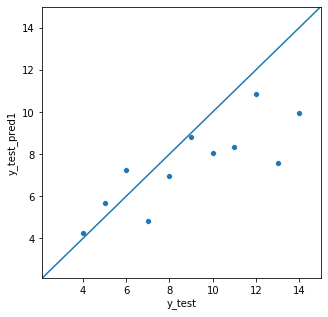

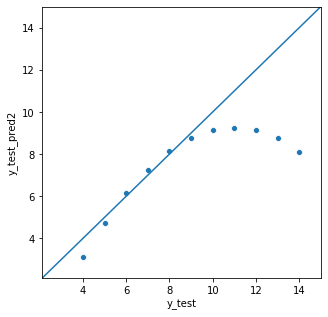

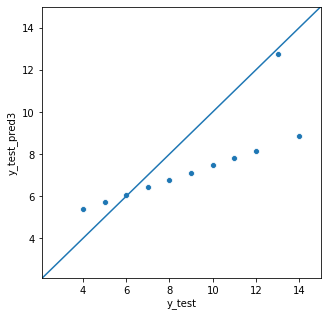

In [6]:
import matplotlib.pyplot as plt
from seaborn import scatterplot as scatter

plt.figure(figsize=(5, 5))
scatter(x='y_test', y='y_test_pred1', data=data)
plt.ylim(data.min().min()-1, data.max().max()+1)
plt.xlim(data.min().min()-1, data.max().max()+1)
plt.plot([2,15], [2,15])
plt.show()

plt.figure(figsize=(5, 5))
scatter(x='y_test', y='y_test_pred2', data=data)
plt.ylim(data.min().min()-1, data.max().max()+1)
plt.xlim(data.min().min()-1, data.max().max()+1)
plt.plot([2,15], [2,15])
plt.show()

plt.figure(figsize=(5, 5))
scatter(x='y_test', y='y_test_pred3', data=data)
plt.ylim(data.min().min()-1, data.max().max()+1)
plt.xlim(data.min().min()-1, data.max().max()+1)
plt.plot([2,15], [2,15])
plt.show()

__Task__: Inspect the residuals and their distribution!

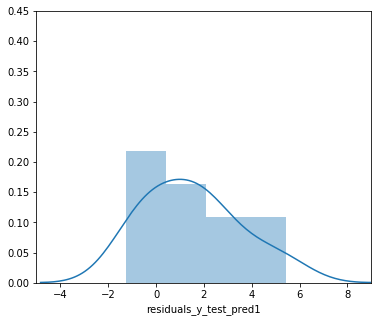

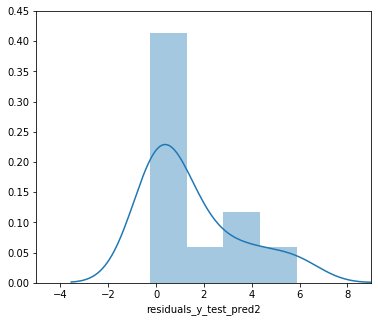

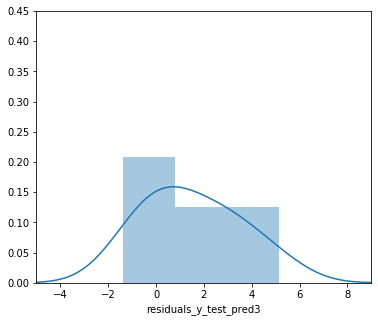

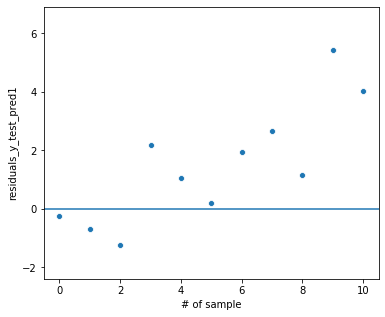

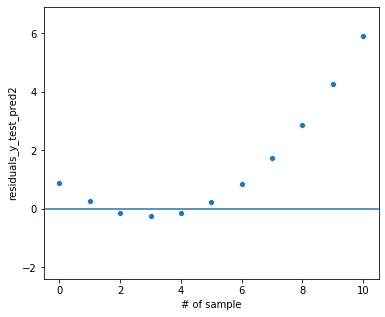

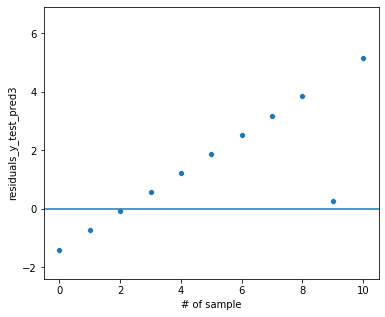

In [7]:
from seaborn import distplot as dist

data = data.sort_values(by='y_test', axis=0)

residuals = -data[['y_test_pred1', 'y_test_pred2', 'y_test_pred3']].subtract(data.y_test, axis='index')
residuals = residuals.add_prefix('residuals_')

plt.figure(figsize=(6, 5))
dist(residuals.residuals_y_test_pred1)
plt.ylim(0, 0.45)
plt.xlim(-5, 9)
plt.show()

plt.figure(figsize=(6, 5))
dist(residuals.residuals_y_test_pred2)
plt.ylim(0, 0.45)
plt.xlim(-5, 9)
plt.show()

plt.figure(figsize=(6, 5))
dist(residuals.residuals_y_test_pred3)
plt.ylim(0, 0.45)
plt.xlim(-5, 9)
plt.show()

#residuals.boxplot()

plt.figure(figsize=(6, 5))
plot = scatter(range(len(residuals.residuals_y_test_pred1)), residuals.residuals_y_test_pred1)
plt.xlabel('# of sample')
plt.axhline(0)
plt.ylim(residuals.min().min()-1, residuals.max().max()+1)
plt.show()

plt.figure(figsize=(6, 5))
scatter(range(len(residuals.residuals_y_test_pred2)), residuals.residuals_y_test_pred2)
plt.xlabel('# of sample')
plt.axhline(0)
plt.ylim(residuals.min().min()-1, residuals.max().max()+1)
plt.show()

plt.figure(figsize=(6, 5))
scatter(range(len(residuals.residuals_y_test_pred3)), residuals.residuals_y_test_pred3)
plt.xlabel('# of sample')
plt.axhline(0)
plt.ylim(residuals.min().min()-1, residuals.max().max()+1)
plt.show()

Now decide! Which of the 3 models is the best?
-> Quiz to answer this will be provided during the lecture!

Data are from the so called [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).